<a href="https://colab.research.google.com/github/sumitt1/pythonall/blob/master/retail_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files


uploaded = files.upload()


Saving Ecommerce - UK Retailer.csv to Ecommerce - UK Retailer.csv


In [10]:
import pandas as pd
df = pd.read_csv('Ecommerce - UK Retailer.csv', encoding= 'unicode_escape')
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        1

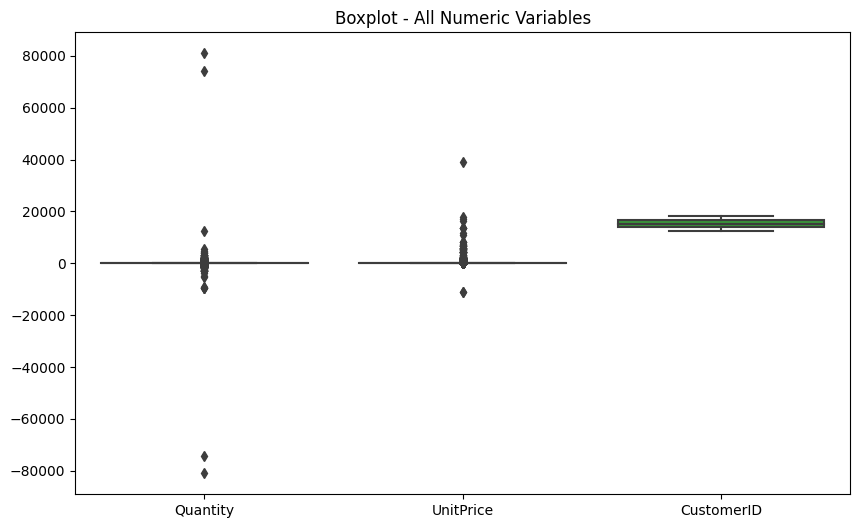

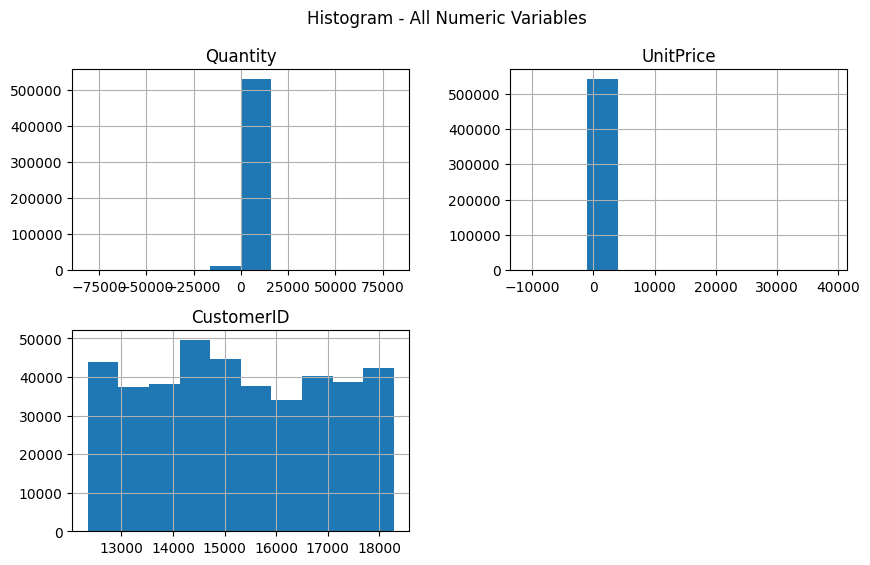

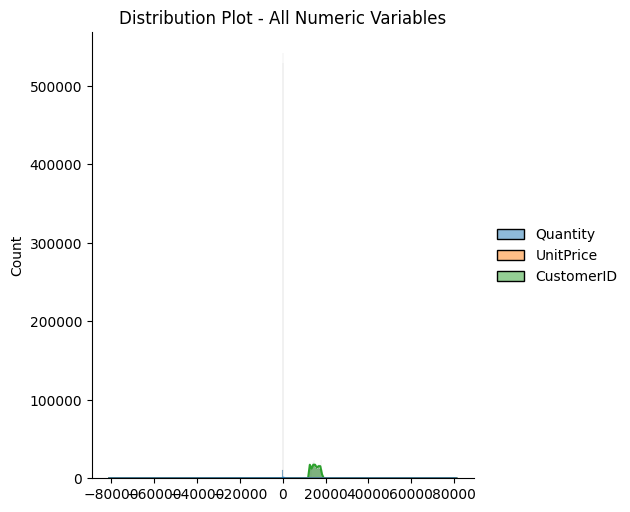

<ipython-input-11-36884a9759d0>:34: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")


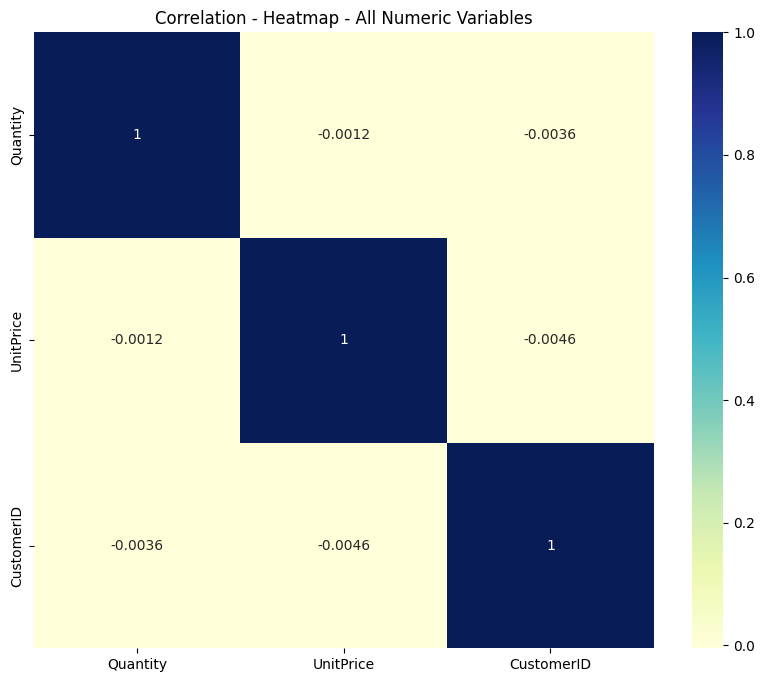

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'df'

# Boxplot - All Numeric Variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title("Boxplot - All Numeric Variables")
plt.show()

# Histogram - All Numeric Variables
df.hist(figsize=(10, 6))
plt.suptitle("Histogram - All Numeric Variables")
plt.show()

# Distribution Plot - All Numeric Variables
sns.displot(data=df.select_dtypes(include='number'), kde=True)
plt.title("Distribution Plot - All Numeric Variables")
plt.show()

# Aggregation for all numerical Columns
aggregated_df = df.describe()

# Unique Values across all columns
unique_values = df.nunique()

# Duplicate values across all columns
duplicates = df[df.duplicated()]

# Correlation - Heatmap - All Numeric Variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation - Heatmap - All Numeric Variables")
plt.show()

# Regression Plot - All Numeric Variables
sns.pairplot(df.select_dtypes(include='number'), kind='reg')
plt.suptitle("Regression Plot - All Numeric Variables")
plt.show()

# Bar Plot - Every Categorical Variable vs every Numerical Variable
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include='number').columns

for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=cat_col, y=num_col, data=df)
        plt.title(f"Bar Plot - {cat_col} vs {num_col}")
        plt.show()

# Pair plot - All Numeric Variables
sns.pairplot(df.select_dtypes(include='number'))
plt.suptitle("Pair plot - All Numeric Variables")
plt.show()

# Line chart to show the trend of data - All Numeric/Date Variables
date_cols = df.select_dtypes(include='datetime').columns

for col in numerical_cols.union(date_cols):
    plt.figure(figsize=(10, 6))
    if col in date_cols:
        df_temp = df.groupby(pd.Grouper(key=col, freq='M')).size().reset_index(name='Count')
        plt.plot(df_temp[col], df_temp['Count'])
        plt.xlabel(col)
    else:
        plt.plot(df[col])
        plt.xlabel('Index')
    plt.ylabel(col)
    plt.title(f"Trend of {col}")
    plt.show()

# Plot the skewness - All Numeric Variables
df.skew().plot(kind='bar', figsize=(10, 6))
plt.title("Skewness - All Numeric Variables")
plt.show()
